In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.special import gamma, gammaln
from randomwalk import random_walk

In [4]:
result, dist = random_walk(p_repete=0.3, p_start=0.8)
result2, dist2 = random_walk(p_repete=0.7, p_start=0.8)
result3, dist3 = random_walk(p_repete=0.9, p_start=0.8)

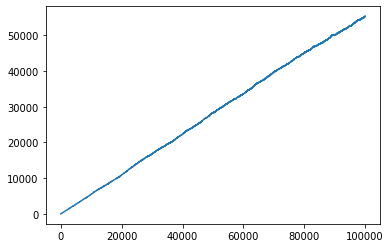

In [3]:
plt.plot(result)

In [5]:
y = np.log(np.array([result[i] for i in range(len(result)) if i in {2**j for j in range(20)}]))
x = np.log(np.array([t for t in range(len(result)) if t in {2**j for j in range(20)}]))
y2 = np.log(np.array([result2[i] for i in range(len(result2)) if i in {2**j for j in range(20)}]))
y3 = np.log(np.array([result3[i] for i in range(len(result3)) if i in {2**j for j in range(20)}]))
#x2 = np.log(np.array([t for t in range(1, 1000)]))
t = np.array([t for t in range(len(result))])
z = np.array([dist[i] for i in range(len(dist))])
z2 = np.array([dist2[i] for i in range(len(dist2))])
z3 = np.array([dist3[i] for i in range(len(dist3))])

In [4]:
def exact_solution(t, p_repete):
    alpha = 2*p_repete-1
    result = t/(2*alpha-1)*(np.exp(gammaln(t+2*alpha)-(gammaln(t+1)+gammaln(2*alpha)))-1)
    result[0] = 1
    return result

In [5]:
t

array([    1,     2,     4,     8,    16,    32,    64,   128,   256,
         512,  1024,  2048,  4096,  8192, 16384, 32768, 65536])

In [6]:
print(exact_solution(t, 0.3))

[1.00000000e+00 1.02222222e+00 2.18311111e+00 4.42426937e+00
 8.87785520e+00 1.77715875e+01 3.55520408e+01 7.11091038e+01
 1.42221073e+02 2.84443785e+02 5.68888510e+02 1.13777756e+03
 2.27555543e+03 4.55111104e+03 9.10222218e+03 1.82044444e+04
 3.64088889e+04]


In [7]:
gamma(256)

inf

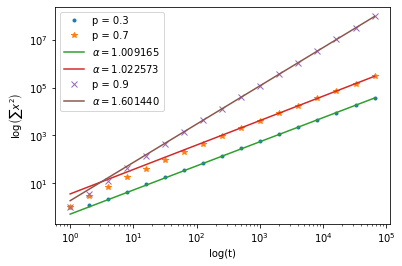

In [6]:
plt.xlabel("log(t)")
plt.ylabel(r"$\log\left(\sum x^2\right)$")
plt.xscale("log")
plt.yscale("log")
plt.plot(np.exp(x), np.exp(y), ".", label = "p = 0.3", zorder=2)
plt.plot(np.exp(x), np.exp(y2), "*", label = "p = 0.7", zorder=2)
#plt.plot(np.log(t), np.log(exact_solution(t, 0.3)), zorder=1, color="black", label="Vorhersage aus Paper")
#plt.plot(np.log(t), np.log(exact_solution(t, 0.7)), zorder=1, color="black")
#plt.plot(np.log(t), np.log(exact_solution(t, 0.9)), zorder=1, color="black")
plt.legend()
plt.savefig("elefant-2.pdf")
plt.savefig("elefant-2.png")
b, a = np.polyfit(x[-5:], y[-5:], 1)
plt.plot(np.exp(x), np.exp(a+b*x), label=r"$\alpha=$%f" % b)
b, a = np.polyfit(x[-5:], y2[-5:], 1)
plt.plot(np.exp(x), np.exp(a+b*x), label=r"$\alpha=$%f" % b)
#plt.xlim(0, 200)
#plt.ylim(0, 1000)
#plt.plot(x, )
#b, a = np.polyfit(x[100:], y[100:], 1)
#plt.plot(x, a+b*x, color = "yellow")
#b, a = np.polyfit(x[:20], y[:20], 1)
#plt.plot(x, a+b*x)
plt.legend()
plt.savefig("elefant-1.pdf")
plt.savefig("elefant-1.png")
plt.plot(np.exp(x), np.exp(y3), "x", label = "p = 0.9", zorder=2)
b, a = np.polyfit(x[-5:], y3[-5:], 1)
plt.plot(np.exp(x), np.exp(a+b*x), label=r"$\alpha=$%f" % b)
#plt.title("RW mit Gedächtnis")
plt.legend()
plt.savefig("elefant.pdf")
plt.savefig("elefant.png")
#print(b)

In [13]:
z1

array([-1.61344593, -1.02165125, -0.44161055,  0.13190507,  0.6870285 ,
        1.22981597,  1.78667992,  2.33878201,  2.90085   ,  3.45241001,
        4.00444903,  4.55715362,  5.11253583,  5.6676232 ,  6.22347666,
        6.77980736,  7.33593824])

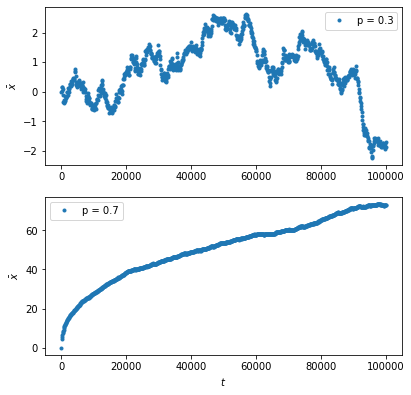

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(6.4, 6.4))
ax1.plot(t[::100], z[::100], ".", label = "p = 0.3", zorder=2)
ax2.plot(t[::100], z2[::100], ".", label = "p = 0.7", zorder=2)
#ax3.plot(t[::100], z3[::100], ".", label = "p = 0.9", zorder=2)
#ax1.set_xlabel(r"$t$")
#ax2.set_xlabel(r"$t$")
#ax3.set_xlabel(r"$t$")
ax1.set_ylabel(r"$\bar{x}$")
ax2.set_ylabel(r"$\bar{x}$")
plt.xlabel(r"$t$")
#ax3.set_ylabel(r"$\bar{x}$")
#plt.ylim(-1, 10)
#plt.xlim(-1, 100)
ax1.legend()
ax2.legend()
#ax3.legend()
#plt.title("RW mit Gedächtnis")
plt.savefig("elefant_mean.pdf")
plt.savefig("elefant_mean.png", dpi = 300)
#plt.savefig("elefant_mean.pgf")

In [9]:
from randomwalk import random_walk
ps = [0.1*i for i in range(1, 10)]

for p in ps:
    random_walk(10000, 100000, p)

In [70]:
ps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
late_alphas = []
early_alphas = []
for p in ps:
    result = np.genfromtxt("simres"+str(p)+".txt")
    y = np.log(result[100:100000])
    x = np.log(np.array([t for t in range(100, 100000)])) 
    b, a = np.polyfit(x, y, 1)
    late_alphas.append(b)
    y = np.log(result[2:20])
    x = np.log(np.array([t for t in range(2, 20)])) 
    b, a = np.polyfit(x, y, 1)
    early_alphas.append(b)
print(ps)
print(early_alphas)
print(late_alphas)
result = np.vstack((ps, early_alphas, late_alphas))
print(result)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[1.1343921979658578, 1.0480909677124863, 0.9821464220234715, 0.9533136056795788, 0.9992844473661495, 1.0917110661469795, 1.2647952807137004, 1.4809963141180982, 1.7363079678222293]
[0.9977097001476987, 0.9981357591248411, 0.9956825932790757, 0.9970359375476168, 0.996451821736478, 0.9961058625076582, 1.0288429227350882, 1.2317061768078872, 1.6021523237988793]
[[0.1        0.2        0.3        0.4        0.5        0.6
  0.7        0.8        0.9       ]
 [1.1343922  1.04809097 0.98214642 0.95331361 0.99928445 1.09171107
  1.26479528 1.48099631 1.73630797]
 [0.9977097  0.99813576 0.99568259 0.99703594 0.99645182 0.99610586
  1.02884292 1.23170618 1.60215232]]


In [75]:
df = pd.DataFrame(result)
df.columns = result[0]
df = df.drop(index = 0)
print(df)

        0.1       0.2       0.3       0.4       0.5       0.6       0.7  \
1  1.134392  1.048091  0.982146  0.953314  0.999284  1.091711  1.264795   
2  0.997710  0.998136  0.995683  0.997036  0.996452  0.996106  1.028843   

        0.8       0.9  
1  1.480996  1.736308  
2  1.231706  1.602152  


In [236]:
rng = np.random.default_rng()
rng.random()

0.5470292847376103

In [16]:
test = np.array([True, True])
test2 = np.array([1, 1])
test2 + test

array([2, 2])

In [1]:
from randomwalk import random_walk
random_walk(10000, 100000, 0.75)